In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## 1. Concatenar datasets imagenes-EEG

In [ ]:
# Concatenar los 10 registros con 73 imágenes cada uno

registro_pic_1 = pd.read_csv('registro_pic_1.csv', index_col=None)
registro_pic_2 = pd.read_csv('registro_pic_2.csv', index_col=None)
registro_pic_3 = pd.read_csv('registro_pic_3.csv', index_col=None)
registro_pic_4 = pd.read_csv('registro_pic_4.csv', index_col=None)
registro_pic_5 = pd.read_csv('registro_pic_5.csv', index_col=None)
registro_pic_6 = pd.read_csv('registro_pic_6.csv', index_col=None)
registro_pic_7 = pd.read_csv('registro_pic_7.csv', index_col=None)
registro_pic_8 = pd.read_csv('registro_pic_8.csv', index_col=None)
registro_pic_9 = pd.read_csv('registro_pic_9.csv', index_col=None)
registro_pic_10 = pd.read_csv('registro_pic_10.csv', index_col=None)

In [ ]:
pics_eeg = pd.concat([registro_pic_1, registro_pic_2,registro_pic_3,registro_pic_4,registro_pic_5,
                    registro_pic_6,registro_pic_7,registro_pic_8,registro_pic_9,registro_pic_10])

In [ ]:
# CSV con todas las imágenes y su registro EEG correspondiente

pics_eeg.to_csv('pics_eeg.csv', index= False)

## 2. Concatenar datasets imagenes - valencia y arousal

In [6]:
# Datos de arousal y valencia para cada imagen proporcionado por el dataset

pic_A = (pd.DataFrame(pd.read_csv('A.txt', sep= '\t', index_col=None))).drop(['Internal norms','External norms'], axis = 1)
pic_H = pd.DataFrame(pd.read_csv('H.txt',sep= '\t', index_col=None)).drop(['Internal norms','External norms'], axis = 1)
pic_N = pd.DataFrame(pd.read_csv('N.txt', sep= '\t',index_col=None))
pic_Sn = pd.DataFrame(pd.read_csv('Sp.txt', sep= '\t',index_col=None))
pic_Sp = pd.DataFrame(pd.read_csv('Sn.txt',sep= '\t', index_col=None))
pic_P = pd.DataFrame(pd.read_csv('P.txt',sep= '\t', index_col=None))

In [7]:
pic_A['cluster'] = 1
pic_H['cluster'] = 2
pic_N['cluster'] = 3
pic_Sn['cluster'] = 4
pic_Sp['cluster'] = 5
pic_P['cluster'] = 6

In [8]:
pics_val_aro = pic_A.append([pic_H,pic_N,pic_Sn,pic_Sp,pic_P], ignore_index = True)
pics_val_aro.rename(columns={'Unnamed: 0': 'pictures'}, inplace=True)
for i in range (pics_val_aro.shape[0]):
    pics_val_aro['pictures'][i] = pics_val_aro['pictures'][i].replace('.jpg','')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [9]:
# Data set con todoas las imáhgenes con su valencia y arousal

pics_val_aro.to_csv('pics_val_aro.csv', index= False)

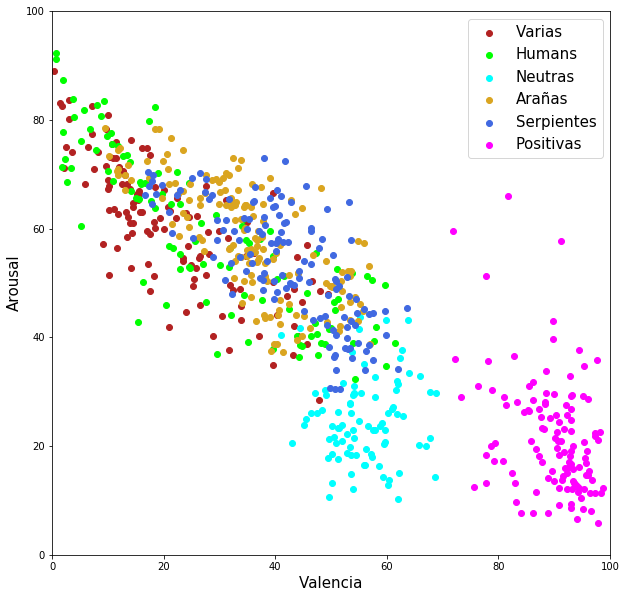

In [22]:
# Representación de las agrupaciones de imágenes según el dataset

fig = plt.figure(figsize= (10,10))
plt.scatter(pic_A.Valence, pic_A.Arousal, c='firebrick', label="Varias")
plt.scatter(pic_H.Valence, pic_H.Arousal, c='lime', label="Humans")
plt.scatter(pic_N.Valence, pic_N.Arousal, c='cyan', label="Neutras")
plt.scatter(pic_Sn.Valence, pic_Sn.Arousal, c='goldenrod', label="Arañas")
plt.scatter(pic_Sp.Valence, pic_Sp.Arousal, c='royalblue', label="Serpientes")
plt.scatter(pic_P.Valence, pic_P.Arousal, c='magenta', label="Positivas")
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel('Valencia', fontsize = 15)
plt.ylabel('Arousal', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()
fig.savefig('clusters_dataset.png')